Keiana Dunn
Week 13
5/13/19
Using Dropout rates and spliting training and testing data 
Pima Indians - diabetes prediction
Neural Network for binary classification

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.models import model_from_json
from keras import optimizers
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# set random seed for reproducibility
np.random.seed(7)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8] 

# create model (requires completion)
model = Sequential()
# Input layer (with dropout) # Dropout removes neurons automatically to simply the neural network so it reaches optimum weights and biases( setting weight to 0).
model.add(Dropout(0.5,input_shape=(8,))) 
# First hidden layer
model.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) # Constraint is the size of the weight. 
# Second hidden layer
model.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Added validation split to split dataset into training and test data (70% training and 30% test or validation)
history=model.fit(X,Y,validation_split=0.333,epochs=1000,verbose=0) 

# Evaluate the model
scores = model.evaluate(X, Y)
Y_predict = model.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

/home/ktd2001/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
768/768 [==============================] - 0s 16us/step

acc: 66.15%
Saved model to disk
Confusion Matrix
True negatives:  487
False negatives:  247
False positives:  13
True positives:  21


In [2]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 50% Dropout Rate and 30% Test Data')
plt.legend()
#plt.grid()
plt.show()

<Figure size 640x480 with 1 Axes>

The training and test data have convergence. 30% test data found the training model parameters and is performing at a 67% accuracy rate.

In [3]:
# create model (requires completion)
model10 = Sequential()
# Input layer (with dropout) # Dropout removes neurons automatically to simply the neural network so it reaches optimum weights and biases( setting weight to 0).
model10.add(Dropout(0.1,input_shape=(8,))) # Changed dropout rate 
# First hidden layer
model10.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) # Constraint is the size of the weight. 
# Second hidden layer
model10.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model10.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Compile neural network model with learning rate, optimizer, loss function and accuracy metric
model10.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Added validation split to split dataset into training and test data (90% training and 10% test or validation data)
history=model10.fit(X,Y,validation_split=0.1,epochs=1000,verbose=0) 

# Evaluate the model
scores = model10.evaluate(X, Y)
Y_predict = model10.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model10.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model10.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 20us/step

acc: 77.99%
Saved model to disk
Confusion Matrix
True negatives:  481
False negatives:  150
False positives:  19
True positives:  118


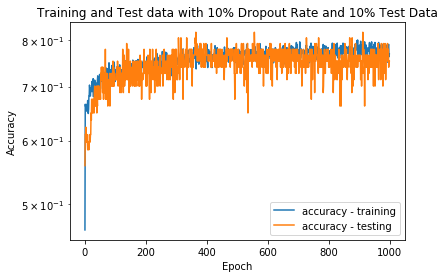

In [4]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 10% Dropout Rate and 10% Test Data')
plt.legend()
#plt.grid()
plt.show()

The test data is performing at a 77% accuracy rate with a 10% dropout rate and 10% test data. There is noise and overfitting of the data.

In [5]:
# create model (requires completion)
model20 = Sequential()
# Input layer (with dropout) # Dropout removes neurons automatically to simply the neural network so it reaches optimum weights and biases( setting weight to 0).
model20.add(Dropout(0.2,input_shape=(8,))) # Changed dropout rate 
# First hidden layer
model20.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) # Constraint is the size of the weight. 
# Second hidden layer
model20.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model20.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Added validation split to split dataset into training and test data (80% training and 20% test or validation)
history=model20.fit(X,Y,validation_split=0.2,epochs=1000,verbose=0) 

# Evaluate the model
scores = model20.evaluate(X, Y)
Y_predict = model20.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model20.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model20.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model20.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 17us/step

acc: 73.18%
Saved model to disk
Confusion Matrix
True negatives:  487
False negatives:  193
False positives:  13
True positives:  75


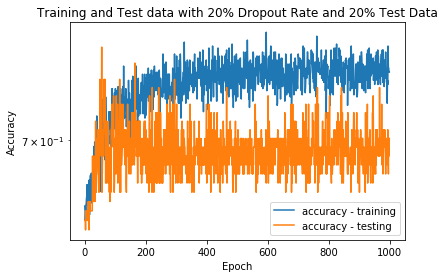

In [6]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 20% Dropout Rate and 20% Test Data')
plt.legend()
#plt.grid()
plt.show()

Training and test data have convergence and is at a 73% accuracy rate. More overfitting observed with dataset. 

In [7]:
# create model (requires completion)
model30 = Sequential()
# Input layer (with dropout) # Dropout removes neurons automatically to simply the neural network so it reaches optimum weights and biases( setting weight to 0).
model30.add(Dropout(0.3,input_shape=(8,))) # Changed dropout rate 
# First hidden layer
model30.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) # Constraint is the size of the weight. 
# Second hidden layer
model30.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model30.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model30.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Added validation split to split dataset into training and test data (70% training and 30% test or validation)
history=model30.fit(X,Y,validation_split=0.3,epochs=1000,verbose=0) 

# Evaluate the model
scores = model30.evaluate(X, Y)
Y_predict = model30.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model30.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model30.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model30.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 28us/step

acc: 68.88%
Saved model to disk
Confusion Matrix
True negatives:  493
False negatives:  232
False positives:  7
True positives:  36


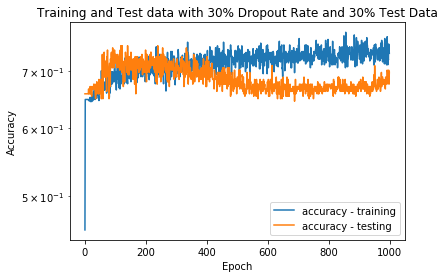

In [8]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 30% Dropout Rate and 30% Test Data')
plt.legend()
#plt.grid()
plt.show()

Overfitting observed with training and test data. 30% dropout and 30% test data is performing at 68%. 

In [9]:
# create model (requires completion)
model50 = Sequential()
# Input layer (with dropout) # Dropout removes neurons automatically to simply the neural network so it reaches optimum weights and biases( setting weight to 0).
model50.add(Dropout(0.5,input_shape=(8,))) # Changed dropout rate 
# First hidden layer
model50.add(Dense(10,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3))) # Constraint is the size of the weight. 
# Second hidden layer
model50.add(Dense(8,  kernel_initializer='normal', activation='relu',kernel_constraint=maxnorm(3)))
# Output (target) layer
model50.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model50.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Added validation split to split dataset into training and test data (70% training and 30% test or validation)
history=model50.fit(X,Y,validation_split=0.1,epochs=1000,verbose=0) 

# Evaluate the model
scores = model50.evaluate(X, Y)
Y_predict = model50.predict(X)

# Accuracy rate
print("\n%s: %.2f%%" % (model50.metrics_names[1], scores[1]*100))

# Save model to disk
# Save model structure as json
model_json = model50.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
# Save weights and biases to HD5 file
model50.save_weights('model.h5')

print('===================')
print('Saved model to disk')
print('===================')

# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict]
y_pred = np.array(rounded,dtype='int64')
print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred)
print('True negatives: ',CM[0,0])
print('False negatives: ',CM[1,0])
print('False positives: ',CM[0,1])
print('True positives: ',CM[1,1])

768/768 [==============================] - 0s 20us/step

acc: 65.10%
Saved model to disk
Confusion Matrix
True negatives:  500
False negatives:  268
False positives:  0
True positives:  0


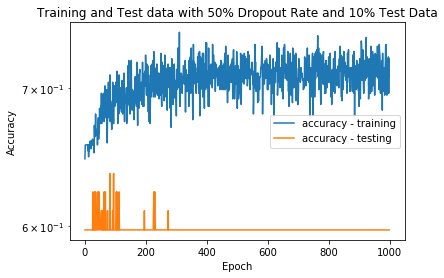

In [11]:
import matplotlib.pyplot as plt
accuracy_training = history.history['acc']
loss = history.history['loss']
accuracy_testing = history.history['val_acc']
#plt.semilogy(loss,label='loss')
plt.semilogy(accuracy_training,label='accuracy - training')
plt.semilogy(accuracy_testing,label='accuracy - testing')
plt.xlabel('Epoch' )
plt.ylabel('Accuracy')
plt.title('Training and Test data with 50% Dropout Rate and 10% Test Data')
plt.legend()
#plt.grid()
plt.show()

Overfitting observed with training and test data. 30% Dropout rate and 10% test data used is performing at a 65% accuracy rate

# Reflection

The higher dropout rate (50%) and percentage of testing data (30%) produced a graph with lesser noise and a higher accuracy rate. 